In [1]:
import pprint as pprint
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler


In [2]:
import warnings
warnings.filterwarnings("ignore")
style.use('seaborn-whitegrid')

In [3]:
df = pd.read_csv('final_data_set.csv')
df = df.drop('Unnamed: 0', axis=1)

In [4]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,sqft_living15,sqft_lot15,walk_score,transit_score,pers_crime_score,prop_crime_score,income,renovated_yrs_ago,log_price
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,...,60,1340,5650,46,46,2,3,71524,60,12.309982
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,...,64,1690,7639,64,50,2,3,56208,24,13.195614
2,180000,2,1.00,770,10000,1.0,0,0,3,6,...,82,2720,8062,19,26,2,3,96863,82,12.100712
3,662500,3,2.50,3560,9796,1.0,0,0,3,8,...,50,2210,8925,46,40,3,3,72383,50,13.403776
4,468000,2,1.00,1160,6000,1.0,0,0,4,7,...,73,1330,6000,72,48,1,2,103917,73,13.056224


In [6]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15', 'walk_score', 'transit_score', 'pers_crime_score',
       'prop_crime_score', 'income', 'renovated_2', 'renovated_yrs_ago',
       'log_price'],
      dtype='object')

In [5]:
# Set our X and y in preparation for train/test/split
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15',
       'walk_score', 'transit_score', 'pers_crime_score', 'prop_crime_score',
       'income', 'renovated_yrs_ago']]

y = pd.DataFrame(df['log_price'])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

In [72]:
# scikit learn requires the inputs to be in this shape
# X_train = X_train.values.reshape((len(X_train),1));
# X_test = X_test.values.reshape((len(X_test),1));
y_train = y_train.values.reshape((len(y_train),));
y_test = y_test.values.reshape((len(y_test),));

In [7]:
# First, let's get a look at our plain vanilla, "baseline" model.
lm = LinearRegression()
lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

# Get R-Squared for predictions
print(lm.score(X_test, y_test))

0.7433097269969389


In [66]:
X = df[['sqft_living',
       'waterfront', 'view', 'condition', 'grade', 'yr_built', 'sqft_living15',
       'walk_score', 'pers_crime_score',
       'income', 'renovated_yrs_ago']]

In [67]:
est = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(), ElasticNetCV())
est.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('elasticnetcv', ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0))])

In [68]:
pred = est.predict(X_test)

In [ ]:
def evaluate_model(X_train, y_train, X_test, y_test):
    print('Train R^2: ', est.score(X_train, y_train))
    print(mean_squared_error(y_train, est.predict(X_train)), 'Train SSE:')
    print('Test R^2: ', est.score(X_test, y_test))
    print('Test SSE:', mean_squared_error(y_test, est.predict(X_test)))
    print()
    
def evaluate_trained_model(X_train, y_train):
    print('Train R^2: ', est.score(X_train, y_train))
    print('Train SSE:', mean_squared_error(y_train, est.predict(X_train)))
    print()

In [69]:
evaluate_model(X_train, y_train, X_test, y_test)

Train R^2:  0.7746370200865289
Train SSE: 0.04109522495317097
Test R^2:  0.7588516028279626
Test SSE: 0.0433525324659422




In [ ]:
# Plot the linear regression
def plot_regression(predicted, actual, save_location=None):
    sns.set_context('poster')
    fig, ax = plt.subplots(figsize=(12,10))
    sns.regplot(np.exp(predicted), np.exp(actual), line_kws={"color":"r","alpha":0.7,"lw":5}, scatter_kws={'alpha': 0.8, 's': 20}, ax=ax)
    ax.set_xlabel('Predicted price ($)', labelpad=30, fontsize=30)
    ax.set_ylabel('Actual price ($)', labelpad=30, fontsize=30)
    plt.tight_layout()
    plt.show()
    if save_location:
        fig.savefig(save_location, dpi=300)

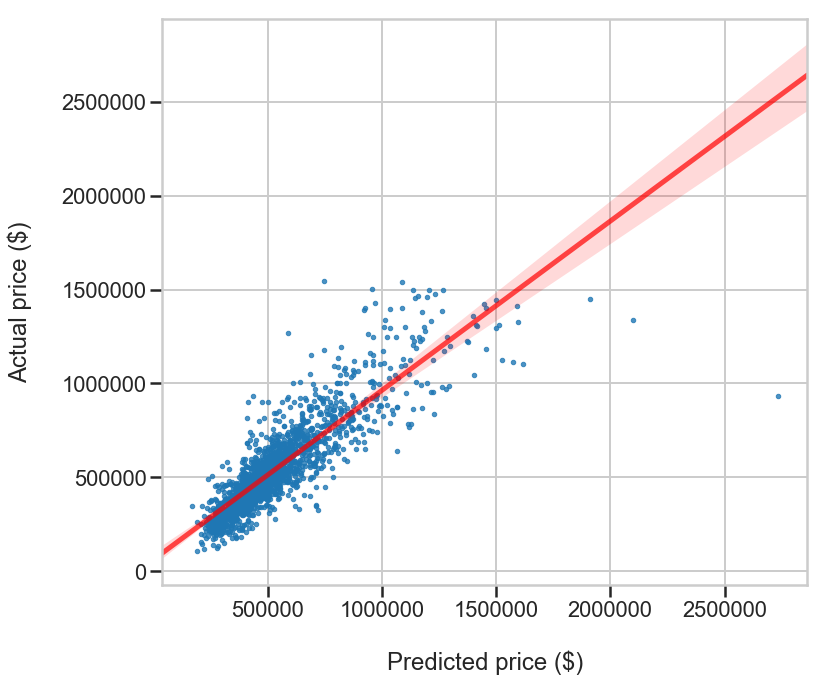

In [73]:
plot_regression(pred, y_test, save_location='plots/regression_plot_1.jpg')

# RidgeCV

In [9]:
# Let's try RidgeCV!
est = make_pipeline(StandardScaler(), RidgeCV(cv=5, alphas=[10, 1, .1, .01, .001, .0001]))
est.fit(X_train, y_train)

evaluate_trained_model(X_train, y_train)

Train R^2:  0.7509188892172949
Train SSE: 0.04542025617131584




In [13]:
coeffs = est.get_params()['ridgecv'].coef_

In [14]:
pprint.pprint(sorted(list(zip(coeffs*100, X.columns))))

[(array([ 0.39447604,  0.34050067,  7.17085799,  0.66401059, -0.93714589,
        2.02498795,  3.52796961,  4.32015736, 12.9253277 ,  7.51799447,
        2.56010131,  7.45002452,  6.00954621, -0.47688774, 10.79548161,
        2.80443061, -5.86748784, -2.23415622,  8.66130243, -2.72073495]),
  'bedrooms')]


 # LassoCV

In [16]:
# Let's run a lasso CV
est = make_pipeline(StandardScaler(), LassoCV(cv=10, alphas=[10, 1, .1, .01, .001, .0001]))
est.fit(X_train, y_train)

evaluate_trained_model(X_train, y_train)

Train R^2:  0.7506989870807029
Train SSE: 0.04546035560456973




/Users/brenner/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
# Let's see what our optimal alpha is
est.get_params()['lassocv'].alpha_

0.001

In [18]:
coeffs = est.get_params()['lassocv'].coef_

In [19]:
intercept = est.get_params()['lassocv'].intercept_

In [20]:
import pprint as pprint

# Multiplied coefficients by 100 to make comparison easier
pprint.pprint(sorted(list(zip(coeffs*100, X.columns))))

[(-5.813729261878229, 'pers_crime_score'),
 (-2.133101410815942, 'prop_crime_score'),
 (-1.872311189282338, 'renovated_yrs_ago'),
 (-0.5853299478247119, 'floors'),
 (-0.0702361836551185, 'sqft_lot15'),
 (0.0, 'sqft_basement'),
 (0.22452712924568166, 'bathrooms'),
 (0.23032066457683958, 'sqft_lot'),
 (0.3142682850625909, 'bedrooms'),
 (1.9079577167539121, 'waterfront'),
 (2.6335981599752416, 'transit_score'),
 (3.4793655493064213, 'view'),
 (3.827441076804624, 'sqft_above'),
 (4.130298996202451, 'condition'),
 (5.907734874182022, 'sqft_living15'),
 (6.879679953054, 'yr_built'),
 (8.617100796096915, 'income'),
 (10.616923313231627, 'walk_score'),
 (12.030775791248775, 'sqft_living'),
 (12.92712609939677, 'grade')]


In [21]:
features = pd.DataFrame(list(zip(coeffs*100, X.columns)), columns=['Coefficient', 'Feature']).sort_values(by='Coefficient')

### This shows we can do away with Sqft. Lot, Sqft. Basement, and several other features barely add any information

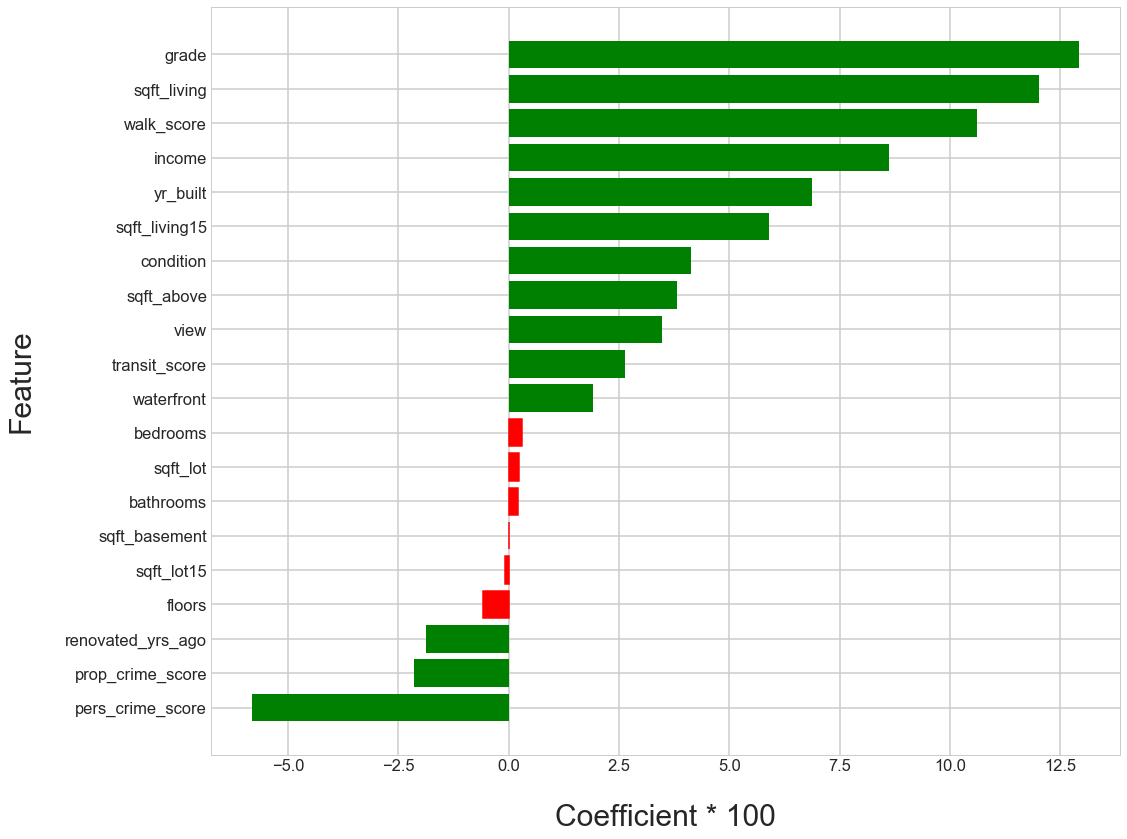

In [23]:
sns.set_context('talk')
with plt.style.context(('seaborn-whitegrid')):
    fig, ax = plt.subplots(figsize=(16,12))
barlist = plt.barh(features['Feature'], features['Coefficient'], color='g')
for i in range(3,9):
    barlist[i].set_color('r')
ax.set_xlabel('Coefficient * 100', labelpad=30, fontsize=30)
ax.set_ylabel('Feature', labelpad=30, fontsize=30)
plt.tight_layout()
# plt.savefig('plots/coefficients2.jpg', dpi=300)

## Now let's remove those features and try again

In [28]:
# Removing the features eliminated by Lasso normalization
X = df[['sqft_living', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built', 'sqft_living15',
       'walk_score', 'transit_score', 'pers_crime_score', 'prop_crime_score',
       'income', 'renovated_yrs_ago']]

y = pd.DataFrame(df['log_price'])

In [26]:
# Let's try Ridge normalization again!
est = make_pipeline(StandardScaler(), RidgeCV(cv=5, alphas=[10, 1, .1, .01, .001, .0001]))
est.fit(X_train, y_train)

evaluate_trained_model(X_train, y_train)


Train R^2:  0.7509188892172949
Train SSE: 0.04542025617131584


Test R^2:  0.743388346853739
Test SSE: 0.046132444397819786




In [29]:
predictions = est.predict(X_test)

In [30]:
coeffs = est.get_params()['ridgecv'].coef_

In [31]:
pprint.pprint(sorted(list(zip(coeffs*100, X.columns))))

[(array([ 0.39447604,  0.34050067,  7.17085799,  0.66401059, -0.93714589,
        2.02498795,  3.52796961,  4.32015736, 12.9253277 ,  7.51799447,
        2.56010131,  7.45002452,  6.00954621, -0.47688774, 10.79548161,
        2.80443061, -5.86748784, -2.23415622,  8.66130243, -2.72073495]),
  'sqft_living')]


In [35]:
# scikit learn requires the inputs to be in this shape
# X_train = X_train.values.reshape((len(X_train),1));
# X_test = X_test.values.reshape((len(X_test),1));
y_train = y_train.values.reshape((len(y_train),));
y_test = y_test.values.reshape((len(y_test),));

# Plot the new one with fewer variables

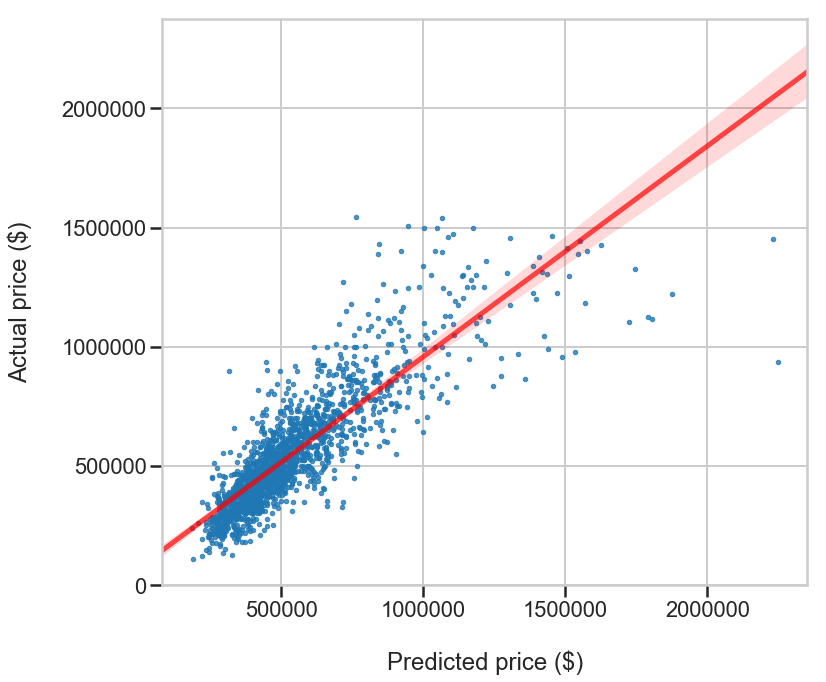

In [36]:
plot_regression(pred, y_test, save_location='plots/regression_plot_2.jpg')

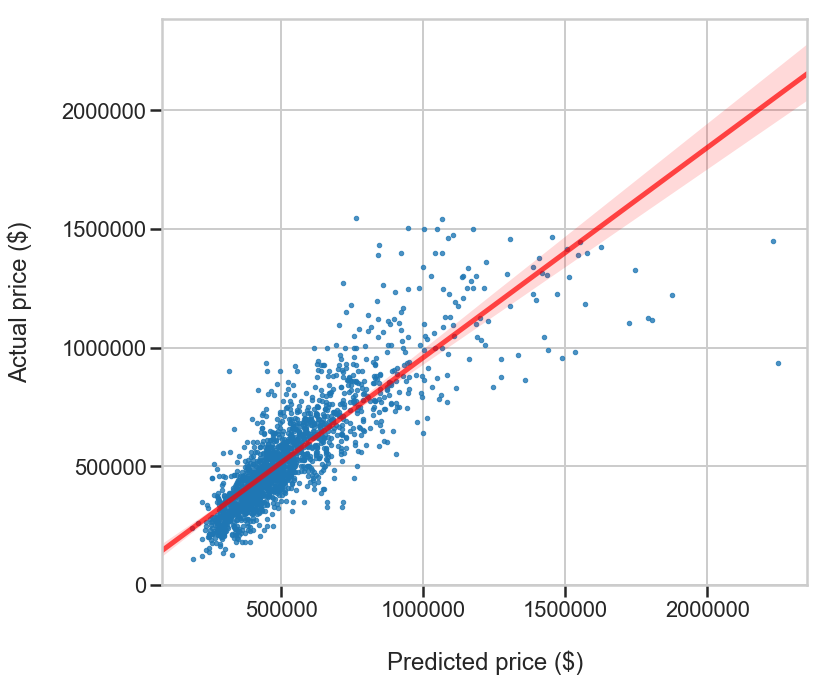

In [37]:
plot_regression(predictions, y_test, save_location='plots/regression_plot_3.jpg')

In [39]:
coeffs = est.get_params()['ridgecv'].coef_
pprint.pprint(sorted(list(zip(coeffs*100, X.columns))))

[(array([ 0.39447604,  0.34050067,  7.17085799,  0.66401059, -0.93714589,
        2.02498795,  3.52796961,  4.32015736, 12.9253277 ,  7.51799447,
        2.56010131,  7.45002452,  6.00954621, -0.47688774, 10.79548161,
        2.80443061, -5.86748784, -2.23415622,  8.66130243, -2.72073495]),
  'sqft_living')]


In [200]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15',
       'walk_score', 'transit_score', 'pers_crime_score', 'prop_crime_score',
       'income', 'renovated_yrs_ago'],
      dtype='object')

# Add Polynomials

In [43]:
# Let's run a lasso CV with Polynomials!
for i in range(1, 3):
    est = make_pipeline(PolynomialFeatures(i), StandardScaler(), RidgeCV(cv=5, alphas=[.1, .01, .001, .0001]))
    est.fit(X_train, y_train)
    print(f'Polynomial degrees: {i}')
    evaluate_trained_model(X_train, y_train)

Polynomial degrees: 1
Train R^2:  0.7509220676705487
Train SSE: 0.04541967657633747


Polynomial degrees: 2
Train R^2:  0.7890496282059147
Train SSE: 0.03846706759984046




Note: Although we ran polynomials with higher degrees that showing a higher R-squared, those were not computed properly - polynomials were only possible up to the 2nd degree

## Final Regression Model Output:

For our final model, we added 2nd degree polynomials to our previous model using RidgeCV.

In [41]:
est = make_pipeline(PolynomialFeatures(2), StandardScaler(), RidgeCV(cv=5, alphas=[.1, .01, .001, .0001]))
est.fit(X_train, y_train)
predictions = est.predict(X_test)

evaluate_model(X_train, y_train, X_test, y_test)

Train R^2:  0.7890496282059147
Train SSE: 0.03846706759984046
Test R^2:  0.7252563548706384
Test SSE: 0.049392129224000825




In [111]:
# Alpha of 0.1 used for RidgeCV
est.get_params()['ridgecv'].alpha_

0.1

In [74]:
import pickle

In [118]:
# Make backups
def pickle_backups(model, y_test, predictions):
    with open('estimator.pkl', 'wb') as f:
        pickle.dump(model, f)

    with open('y_test.pkl', 'wb') as f:
        pickle.dump(y_test, f)

    with open('predictions.pkl', 'wb') as f:
        pickle.dump(predictions, f)
        
pickle_backups(est, y_test, predictions)

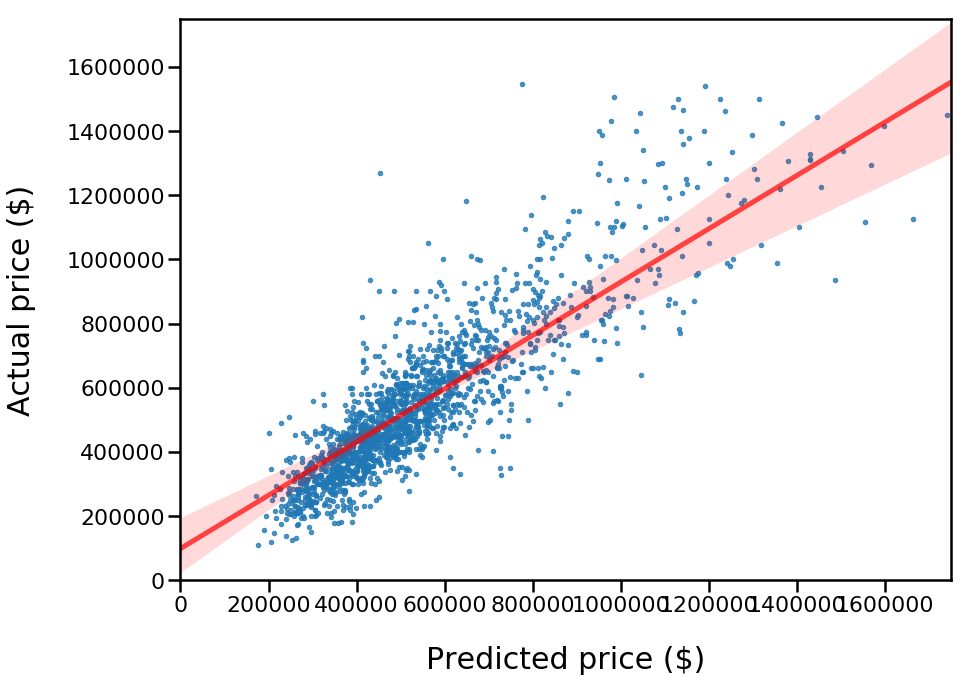

In [115]:
# Plot the actual (non-log) values
sns.set_context('poster')
fig, ax = plt.subplots(figsize=(14,10))
sns.regplot(x=np.exp(predictions), y=np.exp(y_test), line_kws={"color":"r","alpha":0.7,"lw":5}, scatter_kws={'alpha': 0.8, 's': 20}, ax=ax)
ax.set_xlabel('Predicted price ($)', labelpad=30, fontsize=30)
ax.set_ylabel('Actual price ($)', labelpad=30, fontsize=30)
ax.set_ylim([0,1750000])
ax.set_xlim([0,1750000])
ax.set_yticklabels(['0', '$200k', '$400k', '$600k', '$800k', '$1.0m', '$1.2m', '$1.4m', '$1.6m'])
plt.tight_layout()
# plt.savefig('plots/regplot-dollars-weds-2.jpg')

In [31]:
resid = np.exp(y_test) - np.exp(predictions)

In [32]:
resid_df = pd.DataFrame(resid)

In [168]:
resid_df.describe()

,0
count,1.756000e+03
mean,6.992757e+03
std,1.475849e+05
min,-3.655726e+06
25%,-5.659608e+04
50%,2.385180e+03
75%,6.651213e+04
max,8.166891e+05


In [34]:
ylabels2

[0, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000]

In [158]:
np.mean(resid)

6992.757337265996

In [55]:
xlabels = list(range(0, 1600000, 200000))

In [58]:
ylabels3 = list(range(-600000, 800000, 200000))
ylabels3[0] = ''

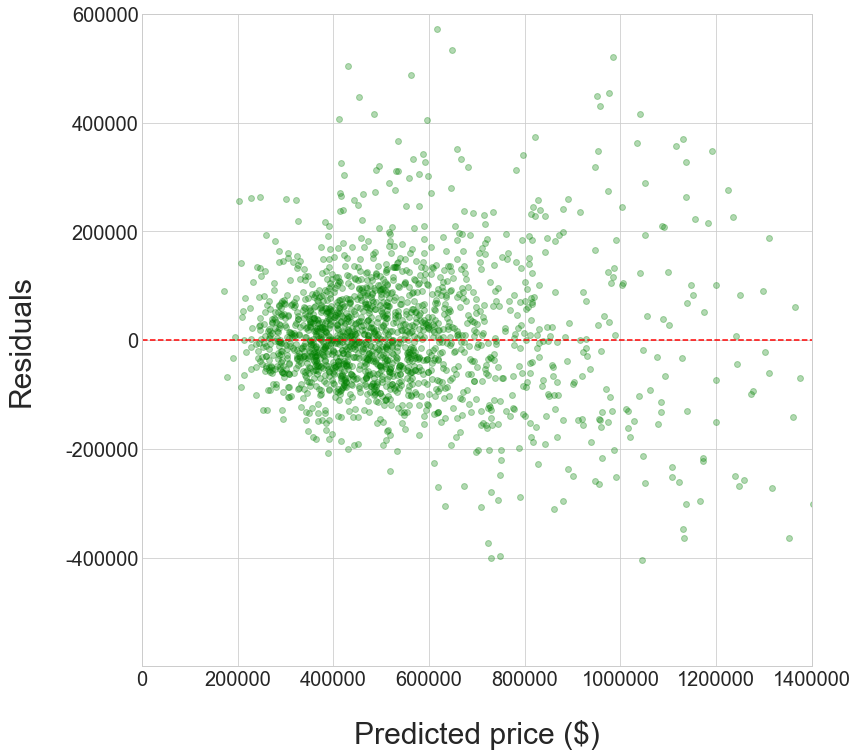

In [61]:
fig, ax = plt.subplots(figsize=(12,12))
sns.regplot(x=np.exp(predictions), y=resid, scatter_kws={'alpha': 0.3, 's': 35, 'color': 'green'}, fit_reg=False, x_jitter=True, y_jitter=True)
ax.set_xlabel('Predicted price ($)', labelpad=30, fontsize=30)
ax.set_ylabel('Residuals', labelpad=30, fontsize=30)
plt.axhline(y=0.0, color='r', linestyle='--')
ax.set_xlim([0,1400000])
ax.set_ylim([-600000,600000])
ax.set_xticklabels(xlabels, fontsize=20);
ax.set_yticklabels(['0', '$200k', '$400k', '$600k', '$800k', '$1.0m', '$1.2m', '$1.4m'], fontsize=20);
# plt.savefig('plots/residuals_dollars.jpg')

### Miscellaneous tuning of parameters that we used along the way to determine our final model

In [ ]:
est.fit(X_train, y_train)
print('Train R^2: ',est.score(X_train, y_train))
print('Train SSE:', 
      mean_squared_error(y_train, est.predict(X_train)))
print('Test R^2: ', est.score(X_test, y_test))
print('Test SSE:', 
      mean_squared_error(y_test, est.predict(X_test)))

In [66]:
degrees = [0,1,2,3,4]
scores = []

for degree in degrees:
    est = make_pipeline(PolynomialFeatures(degree), StandardScaler(), LassoCV(alphas=[1,.1, .01, .001, .0001]))
    est.fit(X_train, y_train)
    evaluate_model(X_train, y_train, X_test, y_test)

Degrees: 0
Train R^2:  0.0
Train SSE: 0.18235126713779534
Test R^2:  -0.00035409702747424276
Test SSE: 0.1798389870196103


Degrees: 1
Train R^2:  0.7411592626996222
Train SSE: 0.047199936433605115
Test R^2:  0.7377644978428741
Test SSE: 0.04714347370461272


Degrees: 2
Train R^2:  0.7646852313927007
Train SSE: 0.04290994623177813
Test R^2:  0.7519565628980943
Test SSE: 0.044592090538560565


Degrees: 3
Train R^2:  0.776907411875761
Train SSE: 0.040681216133505255
Test R^2:  0.7535682239829176
Test SSE: 0.04430235363662275


Degrees: 4
Train R^2:  0.7846819063499166
Train SSE: 0.03926352721478719
Test R^2:  0.7541725728804087
Test SSE: 0.04419370661467906




In [23]:
alphas = [1e-7, 1e-5, 1e-3, 1e-1, 1e-0]
scores = []
for alpha in alphas:
    est = make_pipeline(StandardScaler(), Lasso(alpha=alpha))

    est.fit(X_train, y_train)
    print(f'Alpha: {alpha}')
    print('Train R^2: ',est.score(X_train, y_train))
    print('Train SSE:', 
          mean_squared_error(y_train, est.predict(X_train)))
    print('Test R^2: ', est.score(X_test, y_test))
    print('Test SSE:', 
          mean_squared_error(y_test, est.predict(X_test)))
    print('\n')
    scores.append((est.score(X_train, y_train), est.score(X_test, y_test)))

Alpha: 1e-07
Train R^2:  0.7590337091356856
Train SSE: 0.040319141860249465
Test R^2:  0.7416805888477027
Test SSE: 0.06012126755688715


Alpha: 1e-05
Train R^2:  0.7590333980567922
Train SSE: 0.040319193910824634
Test R^2:  0.7416762400900081
Test SSE: 0.06012227968688439


Alpha: 0.001
Train R^2:  0.7586600469289441
Train SSE: 0.0403816640473462
Test R^2:  0.7406746192029934
Test SSE: 0.060355396962392865


Alpha: 0.1
Train R^2:  0.4992102030091564
Train SSE: 0.08379352478977622
Test R^2:  0.5153345150005546
Test SSE: 0.11280105962327713


Alpha: 1.0
Train R^2:  0.0
Train SSE: 0.16732274757448443
Test R^2:  -0.0002066845794210792
Test SSE: 0.23278813399095816




/Users/brenner/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/brenner/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [49]:
est.get_params()['linearregression'].coef_

array([[ 5.68169392e+06, -4.60802485e+06,  4.32364323e+06, ...,
         4.27056626e+04,  1.56043551e+03,  5.69322371e+04]])

In [25]:
# Without StandardScaler
alphas = [1e-7, 1e-5, 1e-3, 1e-1, 1e-0]
scores = []
for alpha in alphas:
    est = make_pipeline(Lasso(alpha=alpha))

    est.fit(X_train, y_train)
    print(f'Alpha: {alpha}')
    evaluate_model(X_train, y_train, X_test, y_test)

Alpha: 1e-07
Train R^2:  0.7590337091674357
Train SSE: 0.04031914185493695
Test R^2:  0.7416805967539695
Test SSE: 0.06012126571678237


Alpha: 1e-05
Train R^2:  0.7590336967317955
Train SSE: 0.040319143935702406
Test R^2:  0.7416774449371375
Test SSE: 0.06012199927072709


Alpha: 0.001
Train R^2:  0.7589094116694077
Train SSE: 0.04033993965382361
Test R^2:  0.7412816152977253
Test SSE: 0.06021412467296415


Alpha: 0.1
Train R^2:  0.657186161075701
Train SSE: 0.057360553435370436
Test R^2:  0.6702966312276257
Test SSE: 0.0767351720103


Alpha: 1.0
Train R^2:  0.6279853580524748
Train SSE: 0.06224651202859795
Test R^2:  0.6639791379403603
Test SSE: 0.0782055055888656




/Users/brenner/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/brenner/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/brenner/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


## Created a function so that you can enter your home, and get a predicted value (note that the value is for 2015). Give it a try!

In [254]:
def get_house_estimate():
    params = []
    for parameter in X.columns:
        val = input(f'Enter value for: {parameter}')
        params.append(val)
    params = pd.Series(params)
    home_value = np.exp(est.predict(house_params))
    print('Your home is worth: ${home_value}')
    return home_value

In [251]:
# Showing how the function works! Enter your house's info - and see what the model thinks!
get_house_estimate()

Enter value for: bedrooms 4
Enter value for: bathrooms 2
Enter value for: sqft_living 2100
Enter value for: sqft_lot 2100
Enter value for: floors 2
Enter value for: waterfront 0
Enter value for: view 0
Enter value for: condition 7
Enter value for: grade 7
Enter value for: sqft_above 1900
Enter value for: sqft_basement 200
Enter value for: yr_built 80
Enter value for: sqft_living15 2100
Enter value for: sqft_lot15 2100
Enter value for: walk_score 82
Enter value for: transit_score 72
Enter value for: pers_crime_score 4
Enter value for: prop_crime_score 2
Enter value for: income 71000
Enter value for: renovated_yrs_ago 5


[812314.39460002]


array([812314.39460002])